In [4]:
import sys
import os

sys.path.append("./keras/classification/")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  

from Models_MNV2 import model_version_mb2
from log_visualization_tool import visual_train
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam  # 使用 TensorFlow 的优化器
import keras.backend as K  # Import Keras backend

def cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen", 
                    epoch=300, 
                    save_model_name='pc_book_phone_0926_lower_train.h5',
                    model_summary=True,
                    weights=r"/home/zhangyouan/桌面/zya/NN_net/network/SSD/IMX_681_ssd_mobilenet_git/keras/classification/trained_model/pc_book_phone_0926_lower_train_trainmore_1_13.h5"):
    
    model = model_version_mb2()
    if weights is not None:
        model.load_weights(weights)
        
    test_data_path = os.path.join(data_path, "val")
    train_data_path = os.path.join(data_path, "train")

    # Create data generators
    validation_datagen = ImageDataGenerator(rescale=1. / 255)
    training_datagen = ImageDataGenerator(rescale=1. / 255,
                                          rotation_range=40,  # Rotation range
                                          width_shift_range=0.2,  # Width shift
                                          height_shift_range=0.2,  # Height shift
                                          shear_range=0.2,  # Shear
                                          zoom_range=0.2,  # Zoom
                                          horizontal_flip=True,
                                          fill_mode='nearest')

    # Flow from directory
    training_generator = training_datagen.flow_from_directory(
        train_data_path,
        target_size=(120, 160),
        color_mode="grayscale",
        class_mode='categorical'
    )

    validation_generator = validation_datagen.flow_from_directory(
        test_data_path,
        target_size=(120, 160),
        color_mode="grayscale",
        class_mode='categorical'
    )

    print(validation_generator.class_indices)

    # Set up the optimizer and callbacks
    # adam = Adam(lr=0.01)  # Set learning rate for Adam optimizer
    # reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    # early_stopping = EarlyStopping(monitor='val_loss', patience=30)    
    adam = tf.keras.optimizers.Adam(lr=0.01)  # 改为 tf.keras 的优化器
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
    early_stopping = EarlyStopping(monitor='val_loss', patience=30)
    checkpoint = ModelCheckpoint(save_model_name, monitor='val_loss', save_best_only=True)

    # Compile the model
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    try:
        history = model.fit(
            training_generator,
            epochs=epoch,
            validation_data=validation_generator,
            callbacks=[reduce_lr, early_stopping, checkpoint]
            # callbacks=[reduce_lr, early_stopping]
        )
    except TypeError as e:
        print("TypeError encountered during training:", e)
        # You can add further handling here if needed
        return None  # Return None or handle accordingly

    # Save the model
    model.save(save_model_name)

    return history

if __name__ == "__main__":
    history = cls_model_build(data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/", 
                              epoch=10, 
                              save_model_name='./trained_model/pc_book_phone_1009_lower_train_finetune_1_13.h5')
    if history is not None:
        visual_train(history)


Found 5545 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
{'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}
Epoch 1/10
174/174 [==============================] - 218s 1s/step - loss: 0.0484 - acc: 0.9829 - val_loss: 0.1609 - val_acc: 0.9578
Epoch 2/10
174/174 [==============================] - 210s 1s/step - loss: 0.0441 - acc: 0.9847 - val_loss: 1.6977 - val_acc: 0.7428
Epoch 3/10
174/174 [==============================] - 209s 1s/step - loss: 0.0392 - acc: 0.9849 - val_loss: 0.0910 - val_acc: 0.9656
Epoch 4/10
174/174 [==============================] - 209s 1s/step - loss: 0.0399 - acc: 0.9871 - val_loss: 0.7900 - val_acc: 0.8278
Epoch 5/10
174/174 [==============================] - 209s 1s/step - loss: 0.0405 - acc: 0.9864 - val_loss: 1.7513 - val_acc: 0.7439
Epoch 6/10
174/174 [==============================] - 209s 1s/step - loss: 0.0374 - acc: 0.9858 - val_loss: 0.9726 - val_acc: 0.8406
Epoch 7/10
174/174 [==============================] - 209s 1s/step - loss:

KeyError: 'accuracy'

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


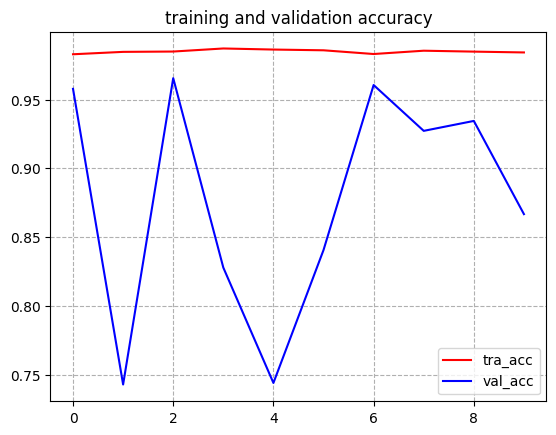

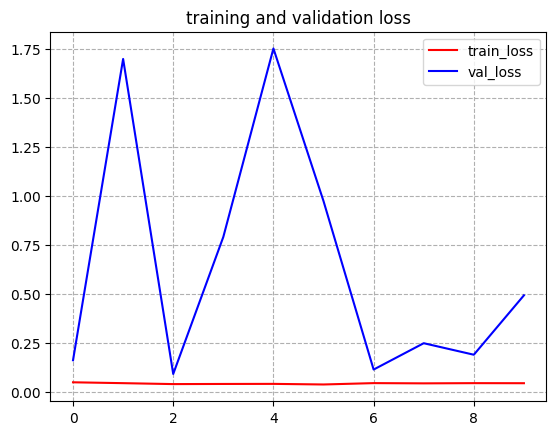

In [8]:
import matplotlib.pyplot as plt
print(history.history.keys())
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#-----------------------------------------------------------
# Plot training and validation accuracy per epoch
#-----------------------------------------------------------
plt.plot(epochs, acc, 'r', label = "tra_acc")
plt.plot(epochs ,val_acc, 'b', label = "val_acc")
plt.title("training and validation accuracy")
plt.legend(loc=0)
plt.grid(ls='--')  # 生成网格
plt.show()
# 曲线呈直线是因为epochs/轮次太少
#-----------------------------------------------------------
# Plot training and validation loss per epoch
#-----------------------------------------------------------
plt.plot(epochs, loss, 'r', label = "train_loss")
plt.plot(epochs ,val_loss, 'b', label = "val_loss")
plt.title("training and validation loss")
plt.legend(loc=0)
plt.grid(ls='--')  # 生成网格
plt.show()
# 曲线呈直线是因为epochs/轮次太少

In [9]:
from keras.preprocessing.image import ImageDataGenerator

data_path=r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/"
test_data_path = data_path + "val"
validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_directory(test_data_path,
                                                                  target_size=(120, 160),
                                                                  color_mode="grayscale",
                                                                  class_mode='categorical')
print(validation_generator.class_indices)

Found 600 images belonging to 3 classes.
{'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}


In [10]:
import os 
import tensorflow as tf
import numpy as np
print("Tensorflow version:", tf.__version__)
from PIL import Image

# 制作量化数据集
path = r"/home/zhangyouan/桌面/zya/dataset/681/PCScreen_Book_PhoneScreen/train/"
list_dir = os.listdir(path)

# labels = {"paper":0, "rock":1, "scissors":2}
labels = {'PcScreen': 0, 'PhoneScreen': 1, 'book': 2}

test_images = []
test_images_link = []
test_labels = []
for i in list_dir:
    path1 = path + i + "/"
    list_label = os.listdir(path1)
    # print(list_label)
    for j in list_label:
        path2 = path1 + j
        tmp = [0, 0, 0]
        tmp[labels[i]]=1
        test_labels.append(tmp)
        test_images_link.append(path2)
        test_images_tmp = Image.open(path2)
        test_images_g = test_images_tmp.convert('L')
        test_images_g_resize = test_images_g.resize((160, 120), Image.ANTIALIAS) # (width, height)
        test_images.append(np.array(test_images_g_resize))

test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images = np.expand_dims(test_images, axis=-1)
test_images = test_images.astype(np.float32) # / 255.0
test_images = test_images / 255.0  # 将数值范围压缩到0~1之间；
# test_images = test_images/127.5-1

model = tf.keras.models.load_model(r'./trained_model/pc_book_phone_1009_lower_train_trainmore_1_13.h5')
# model.summary()
scores = model.evaluate(test_images, test_labels, verbose=0)
print("模型准确度：",scores[1])

Tensorflow version: 1.13.2
模型准确度： 0.8865645
